## Health Expenditure in Australia
##### Analyzed by Hossein Hosseini Giv

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##### We import the data from a .csv file into a pandas dataframe.

In [3]:
expenditure_data = pd.read_csv('D:Data/Health Expenditure Australia.csv')
expenditure_data.shape

(7100, 6)

##### Next, we take a look at the first 20 rows of our data frame.

In [4]:
expenditure_data.head(20)   

,financial_year,state,area_of_expenditure,broad_source_of_funding,detailed_source_of_funding,real_expenditure_millions
0,1997-98,NSW,Administration,Government,Australian Government,315.0
1,1997-98,NSW,Administration,Government,State and local,120.0
2,1997-98,NSW,Administration,Non-government,Private health insurance funds,314.0
3,1997-98,NSW,Aids and appliances,Government,Australian Government,65.0
4,1997-98,NSW,Aids and appliances,Non-government,Individuals,168.0
5,1997-98,NSW,Aids and appliances,Non-government,Other non-government,18.0
6,1997-98,NSW,Aids and appliances,Non-government,Private health insurance funds,78.0
7,1997-98,NSW,All other medications,Government,Australian Government,5.0
8,1997-98,NSW,All other medications,Non-government,Individuals,559.0
9,1997-98,NSW,All other medications,Non-government,Other non-government,16.0


##### Using groupby, we determine the states and the number of rows associated with each of them. 

In [5]:
expenditure_data.groupby('state').size()  

state
ACT    837
NSW    843
NT     851
QLD    851
SA     861
TAS    838
VIC    833
WA     864
dtype: int64

##### Similarly, we use groupby to determine the various areas of expenditure. Then, we do this for two more features. 

In [6]:
expenditure_data.groupby('area_of_expenditure').size()

area_of_expenditure
Administration                  352
Aids and appliances             483
All other medications           482
Benefit-paid pharmaceuticals    240
Capital expenditure             360
Community health                533
Dental services                 599
Medical expense tax rebate      240
Medical services                480
Other health practitioners      483
Patient transport services      599
Private hospitals               550
Public health                   400
Public hospitals                600
Research                        377
dtype: int64

In [7]:
expenditure_data.groupby('detailed_source_of_funding').size()

detailed_source_of_funding
Australian Government             1800
Individuals                       1347
Other non-government              1424
Private health insurance funds    1192
State and local                   1015
dtype: int64

In [9]:
expenditure_data.groupby('broad_source_of_funding').size()

broad_source_of_funding
Government        2815
Non-government    3963
dtype: int64

##### We use a pie chart to visualize the grouping of funding sources, which are categorized into two groups: Government and non-government. This also determines the percentage of each. 

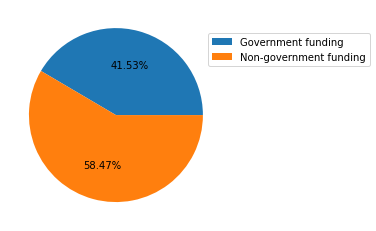

In [10]:
data = [2815, 3963]
labels = ['Government funding', 'Non-government funding']
p = plt.pie(data, autopct = '%1.2f%%')
plt.legend(p[0], labels, bbox_to_anchor = (0.9, 0.9))
plt.show()

In [8]:
expenditure_data = expenditure_data.drop('broad_source_of_funding', axis = 1)
expenditure_data

,financial_year,state,area_of_expenditure,detailed_source_of_funding,real_expenditure_millions
0,1997-98,NSW,Administration,Australian Government,315.0
1,1997-98,NSW,Administration,State and local,120.0
2,1997-98,NSW,Administration,Private health insurance funds,314.0
3,1997-98,NSW,Aids and appliances,Australian Government,65.0
4,1997-98,NSW,Aids and appliances,Individuals,168.0
...,...,...,...,...,...
7095,NaN,NaN,NaN,NaN,NaN
7096,NaN,NaN,NaN,NaN,NaN
7097,NaN,NaN,NaN,NaN,NaN
7098,NaN,NaN,NaN,NaN,NaN


In [9]:
expenditure_data.isna().sum()

financial_year                322
state                         322
area_of_expenditure           322
detailed_source_of_funding    322
real_expenditure_millions     322
dtype: int64

In [13]:
expenditure_data = expenditure_data.dropna()
expenditure_data

,financial_year,state,area_of_expenditure,detailed_source_of_funding,real_expenditure_millions
0,1997-98,NSW,Administration,Australian Government,315.0
1,1997-98,NSW,Administration,State and local,120.0
2,1997-98,NSW,Administration,Private health insurance funds,314.0
3,1997-98,NSW,Aids and appliances,Australian Government,65.0
4,1997-98,NSW,Aids and appliances,Individuals,168.0
...,...,...,...,...,...
6773,2011-12,NT,Public hospitals,Private health insurance funds,1.0
6774,2011-12,NT,Research,Australian Government,81.0
6775,2011-12,NT,Research,State and local,35.0
6776,2011-12,NT,Research,Individuals,0.0


In [14]:
expenditure_data.describe()

,real_expenditure_millions
count,6778.000000
mean,218.093538
std,587.840629
min,-216.000000
25%,7.000000
50%,38.000000
75%,158.000000
max,6838.000000


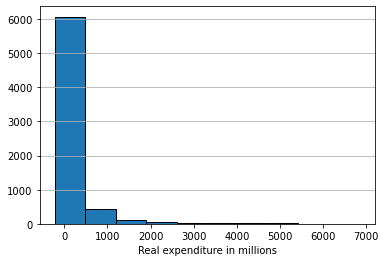

In [32]:
expenditure = expenditure_data['real_expenditure_millions']
plt.hist(expenditure, edgecolor = 'black')
plt.grid(axis = 'y')
plt.xlabel('Real expenditure in millions')
plt.show()

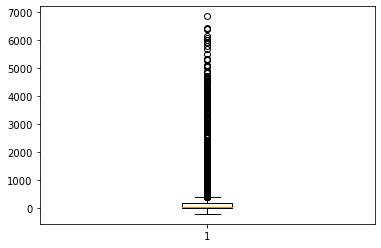

In [35]:
plt.boxplot(expenditure)
plt.show()

In [33]:
expenditure_data_NSW = expenditure_data[expenditure_data['state'] == 'NSW']
expenditure_data_NSW.describe()

,real_expenditure_millions
count,843.000000
mean,572.201661
std,1121.293727
min,-216.000000
25%,62.000000
50%,189.000000
75%,508.000000
max,6838.000000


In [16]:
x = expenditure_data_NSW['detailed_source_of_funding']
x

0                Australian Government
1                      State and local
2       Private health insurance funds
3                Australian Government
4                          Individuals
                     ...              
6364    Private health insurance funds
6365             Australian Government
6366                   State and local
6367                       Individuals
6368              Other non-government
Name: detailed_source_of_funding, Length: 843, dtype: object

In [28]:
expenditure_data[expenditure_data['real_expenditure_millions'] <= 500]

,financial_year,state,area_of_expenditure,detailed_source_of_funding,real_expenditure_millions
0,1997-98,NSW,Administration,Australian Government,315.0
1,1997-98,NSW,Administration,State and local,120.0
2,1997-98,NSW,Administration,Private health insurance funds,314.0
3,1997-98,NSW,Aids and appliances,Australian Government,65.0
4,1997-98,NSW,Aids and appliances,Individuals,168.0
...,...,...,...,...,...
6773,2011-12,NT,Public hospitals,Private health insurance funds,1.0
6774,2011-12,NT,Research,Australian Government,81.0
6775,2011-12,NT,Research,State and local,35.0
6776,2011-12,NT,Research,Individuals,0.0
